In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#import files
path = r'..\02 Data\Original Data'
path2 = r'..\02 Data\Prepared Data'

#import dataframe
df_ords_prods_cust = pd.read_pickle(os.path.join(path2,'ords_prods_cust_combined.pkl'))

In [3]:
df_ords_prods_cust_dropped = df_ords_prods_cust.drop(['Unnamed: 0.1', 'Unnamed: 0_x', 'Unnamed: 0_y', '_merge'], axis=1)

In [4]:
df_ords_prods_cust_dropped_renamed = df_ords_prods_cust_dropped.rename(columns= {'First Name' : 'first_name', 'Surnam' : 'last_name', 'STATE' : 'state', 'Gender' : 'gender', 'Age' : 'age'})

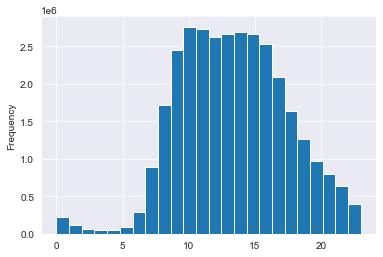

In [21]:
df_histo = df_ords_prods_cust_dropped_renamed['order_hour_of_day'].plot.hist(bins=24)

In [22]:
#export graph
df_histo.figure.savefig(os.path.join(path2, 'df_histo.png'))

The histogram is showing at what hour of the day orders are most frequent. Based on the chart, orders are most frequent between the hours of 10:00 and 15:00, with frequency dropping off after that time.

In [6]:
#flag loyalty members
df_ords_prods_cust_dropped_renamed['max_order'] = df_ords_prods_cust_dropped_renamed.groupby(['user_id'])['order_number'].transform(np.max)
df_ords_prods_cust_dropped_renamed.loc[df_ords_prods_cust_dropped_renamed['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
df_ords_prods_cust_dropped_renamed.loc[(df_ords_prods_cust_dropped_renamed['max_order'] <= 40) & (df_ords_prods_cust_dropped_renamed['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
df_ords_prods_cust_dropped_renamed.loc[df_ords_prods_cust_dropped_renamed['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

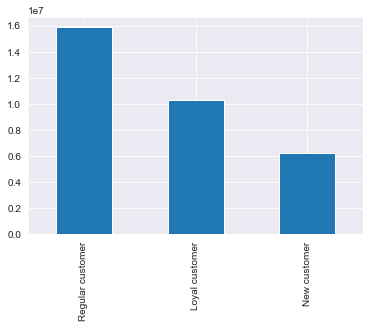

In [7]:
#create bar graph for loyalty members
loyalty_flag_bar = df_ords_prods_cust_dropped_renamed['loyalty_flag'].value_counts().plot.bar()

In [23]:
#export bar graph
loyalty_flag_bar.figure.savefig(os.path.join(path2, 'loyalty_flag_bar.png'))

In [8]:
#create 70-30 sample for line chart
np.random.seed(176)
sample70 = np.random.rand(len(df_ords_prods_cust_dropped_renamed)) <.7
large = df_ords_prods_cust_dropped_renamed[sample70]
small = df_ords_prods_cust_dropped_renamed[~sample70]

In [9]:
#check length for both main df and split df
len(df_ords_prods_cust_dropped_renamed)

32404859

In [10]:
len(large) + len(small)

32404859

In [11]:
#create subset df with only data that is needed
df_spending_hours = small[['prices', 'order_hour_of_day']]

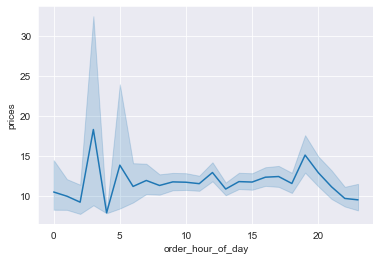

In [12]:
#create line graph
spending_line = sns.lineplot(data = df_spending_hours, x='order_hour_of_day', y='prices')

In [24]:
#export graph
spending_line.figure.savefig(os.path.join(path2, 'spending_line.png'))

In [13]:
#create subset df with only data that is needed
df_age_family = small[['n_dependants', 'age']]

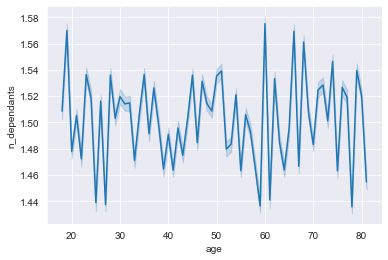

In [14]:
#create line graph
age_family_line = sns.lineplot(data = df_age_family, x='age', y='n_dependants')

There does not appear to be a correlation between age and number of dependants.

In [25]:
#export graph
age_family_line.figure.savefig(os.path.join(path2, 'age_family_line.png'))

In [15]:
#create subset df with only data that is needed
df_age_income = small[['age', 'income']]

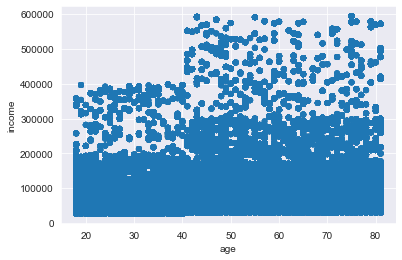

In [16]:
age_income_scatter = sns.scatterplot(data = df_age_income, x='age', y= 'income', edgecolor = 'none')

In [27]:
#export graph
age_income_scatter.figure.savefig(os.path.join(path2, 'age_income_scatter.png'))

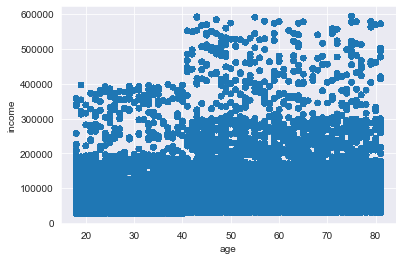

In [18]:
#checking entire dataset
age_income_scatter2 = sns.scatterplot(data = df_ords_prods_cust_dropped_renamed, x='age', y='income', edgecolor = 'none')

In [28]:
crosstab = pd.crosstab(df_ords_prods_cust_dropped_renamed['days_since_prior_order'], df_ords_prods_cust_dropped_renamed['order_number'], dropna= False)

In [29]:
crosstab.to_clipboard()